In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#把src的灰度从中间值拉到更高的值.
#这个是采用的单一比例的方法.
#即使单一比例的方法,也可以对划分阈值点做多点划分,这样采用三段不同的方法.
#这样在low lum时候,可以把lum拉大一些,在中间部分保持不变,在high lum时候把lum放缓一些.
def lum_enhance_linear(src, src_mid=80, dest_mid=160):
    h = src.shape[0]
    w = src.shape[1]
    Ds_min = 0
    Ds_internal = src_mid # 中间
    Ds_max=255
    # 目标
    Dd_min = 0
    Dd_internal = dest_mid #中间
    Dd_max=255   
    dest = np.zeros((h,w),np.uint8)
    for i in range(h):
        for j in range(w):
            if src[i,j]>Ds_min and src[i,j]<=Ds_internal:
                dest[i,j]=int((Dd_internal-Dd_min)/(Ds_internal-Ds_min)*(src[i,j]-Ds_min)+Dd_min)
            else:
                dest[i,j]=int((Dd_max-Dd_internal)/(Ds_max-Ds_internal)*(src[i,j]-Ds_internal)+Dd_internal)
    return dest

In [3]:
def lum_enhance_linear_3parts(src,src_thd1=30, src_thd2=200, dest_thd1=50, dest_thd2=180):
    h = src.shape[0]
    w = src.shape[1]
    dest = np.zeros((h,w),np.uint8)
    for i in range(h):
        for j in range(w):
            if src[i,j]<src_thd1 and src[i,j]>=0:
                dest[i,j] = int(src[i,j]*(dest_thd1/src_thd1))
            elif src[i,j]>=src_thd1 and src[i,j]<=src_thd2:
                dest[i,j] = int(src[i,j]*((dest_thd2-dest_thd1)/(src_thd2-src_thd1))+ dest_thd1*(src_thd2-src_thd1)-src_thd1*(dest_thd2-dest_thd1) )
            else:
                dest[i,j] = int(src[i,j]*((255-dest_thd2)/(255-src_thd2))+ dest_thd2*(255-src_thd2)-src_thd2*(255-dest_thd2) )
    return dest

In [9]:
def lum_enhance_by_exponential(src, b=2.71, c=1.0, a=0):
    h = src.shape[0]
    w = src.shape[1]
    dest = np.zeros((h,w),np.uint8)
    dest = np.array(np.power(b, (c*(src-a)))-1, np.uint8)
    return dest
    

In [37]:
def lum_enhance_hist_Equalization(src):
    h = src.shape[0]
    w = src.shape[1]
    dest = np.zeros((h,w),np.uint8)
    #创建hist统计,统计所有像素出现在灰度级上的概率
    hist = np.zeros(256)
    equalization = np.zeros(256)
    step = 1.0/(h*w)
    #print("step", step)
    #print("src", src)
 
    for i in range(h):
        for j in range(w):
            hist[src[i,j]] = hist[src[i,j]] + step
    #print("hist", hist)
    #利用累计函数均衡化
    sum = 0.0
    for i in range(256):
        sum = sum + hist[i]
        equalization[i] = sum*255+0.5 #转换成灰度描述.
        #以前的某个灰度i它的值就是i.现在呢,它的值是前面所有出现的灰度的像素个数占总像素个数的比例.
        #这个i有可能被抬高,也有可能被削弱,总体而言是单调增的.肯定得保证i之后的比i之前的大,这个是必须的,你总不能这样:
        #比如上一个200的点映射成190, 下一个201的灰度点楞给映射成10,那图像就反色了,就不对了.
    
    #把原图映射成均衡化的图.
    for i in range(h):
        for j in range(w):
            dest[i,j] = equalization[src[i,j]]
    return dest
        
    

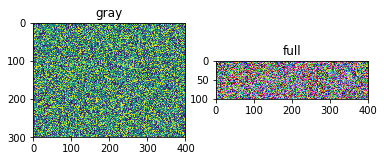

In [39]:
randomByteArray = bytearray(os.urandom(120000))  
flatNumpyArray = np.array(randomByteArray)  
grayImage = flatNumpyArray.reshape(300, 400)  
bgrImage = flatNumpyArray.reshape(100, 400, 3)  

plt.subplot(1, 2, 1)
plt.title("gray")
plt.imshow(grayImage)  
plt.subplot(1, 2, 2)
plt.title("full")
plt.imshow( bgrImage)  

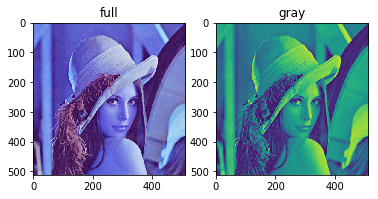

In [41]:
originImage = cv2.imread("lena.jpg")
grayImage = cv2.cvtColor(originImage,cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 1)
plt.title("full")
plt.imshow(originImage)
plt.subplot(1, 2, 2)
plt.title("gray")
plt.imshow(grayImage)

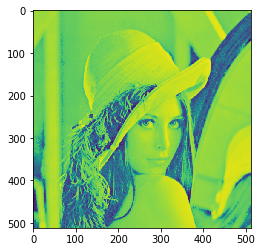

In [34]:
change_gray_image = lum_enhance_linear(grayImage, src_mid=80, dest_mid = 200)
plt.imshow(change_gray_image)

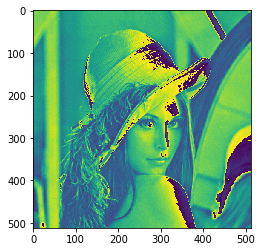

In [35]:
change_gray_image_3parts = lum_enhance_linear_3parts(grayImage, src_thd1=20, src_thd2=200, dest_thd1=40, dest_thd2=180)
plt.imshow(change_gray_image_3parts)

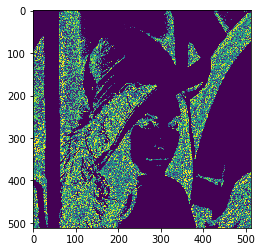

In [36]:
change_gray_image_exponential = lum_enhance_by_exponential(grayImage, b=1.2, c=1.0, a=0)
plt.imshow(change_gray_image_exponential)

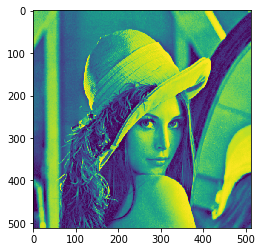

In [38]:
change_gray_image_Equalization = lum_enhance_hist_Equalization(grayImage)
plt.imshow(change_gray_image_Equalization)